### 本文件对应 cookdata.cn 第 4 章。

In [1]:
# 定义常量
PREFIX = './数据/'
DESCRIBE = {
    'CityId': '城市级别',
    'education': '文化程度',
    'idVerify': '身份验证',
    'inCourt': '法院失信传唤记录',
    'maritalStatus': '婚姻状况',
    'netLength': '在网时长',
    'threeVerify': '三要素验证',
    'isDue': '有无逾期记录',
    'isCrime': '有无犯罪记录',
    'isBlackList': '黑名单信息查询记录',
    'Han': '民族',
    'sex': '性别',
    'cashTotalAmt': '总取现金额',
    'cashTotalCnt': '总取现笔数',
    'monthCardLargeAmt': '月最大消费金额',
    'noTransWeekPre': '年无消费周数占比',
    'onlineTransAmt': '网上消费金额',
    'onlineTransCnt': '网上消费笔数',
    'publicPayAmt': '公共事业缴费金额',
    'publicPayCnt': '公共事业缴费笔数',
    'transTotalAmt': '总消费金额',
    'transTotalCnt': '总消费笔数',
    'transCnt_mean': '年消费笔数均值',
    'transCnt_non_null_months': '年有消费笔数记录月数',
    'transAmt_mean': '年消费金额均值',
    'transAmt_non_null_months': '年有消费金额记录月数',
    'cashCnt_mean': '年取现笔数均值',
    'cashCnt_non_null_months': '年有取现笔数记录月数',
    'cashAmt_mean': '年取现金额均值',
    'cashAmt_non_null_months': '年有取现金额记录月数',
    'age': '年龄',
    'card_age': '开卡时长',
}

In [2]:
# import 必要模块

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 显示数据时显示所有列
pd.options.display.max_columns = None

# 设置字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['font.size'] = 10

# import 自己写的工具函数
import cookdata_util as cutil

In [3]:
# 读取数据
data = pd.read_csv(PREFIX + 'data-raw.csv')

# 查看数据前 5 行
data.head(5)

,CityId,Han,age,card_age,cashAmt_mean,cashAmt_non_null_months,cashCnt_mean,cashCnt_non_null_months,cashTotalAmt,cashTotalCnt,education,idVerify,inCourt,isBlackList,isCrime,isDue,maritalStatus,monthCardLargeAmt,netLength,noTransWeekPre,onlineTransAmt,onlineTransCnt,publicPayAmt,publicPayCnt,sex,threeVerify,transAmt_mean,transAmt_non_null_months,transCnt_mean,transCnt_non_null_months,transTotalAmt,transTotalCnt,Default
0,一线城市,0,38.0,2,0.0,0,0.0,0,0,0,小学,不一致,0,0,0,0,已婚,0,无效,0.87,-7710.0,2.0,0.0,0.0,女,不一致,0.000000,2,0.000000,2,0,0,0.0
1,一线城市,0,39.0,19,0.0,0,0.0,0,0,0,小学,不一致,0,0,0,0,未婚,400,0-6个月,0.87,700.0,3.0,0.0,0.0,男,一致,180.000000,5,1.000000,5,900,5,0.0
2,二线城市,0,40.0,16,0.0,0,0.0,0,0,0,小学,NaN,0,0,0,0,NaN,17250,6-12个月,0.46,-164560.0,39.0,770.0,2.0,女,一致,2378.888889,9,0.333333,9,21410,3,0.0
3,其它,0,38.0,13,22000.0,1,6.0,1,22000,6,本科以上,NaN,0,0,0,0,未婚,176800,24个月以上,0.69,12660.0,7.0,0.0,0.0,男,一致,28008.000000,10,1.500000,10,280120,15,0.0
4,二线城市,0,24.0,8,0.0,0,0.0,0,0,0,小学,NaN,0,0,0,0,已婚,3720,12-24个月,0.83,-5260.0,15.0,4170.0,8.0,男,一致,842.000000,5,1.800000,5,4220,9,0.0


In [4]:
data.describe(include='all')

,CityId,Han,age,card_age,cashAmt_mean,cashAmt_non_null_months,cashCnt_mean,cashCnt_non_null_months,cashTotalAmt,cashTotalCnt,education,idVerify,inCourt,isBlackList,isCrime,isDue,maritalStatus,monthCardLargeAmt,netLength,noTransWeekPre,onlineTransAmt,onlineTransCnt,publicPayAmt,publicPayCnt,sex,threeVerify,transAmt_mean,transAmt_non_null_months,transCnt_mean,transCnt_non_null_months,transTotalAmt,transTotalCnt,Default
count,47337,47337.000000,47337.000000,47337.000000,47337.000000,47337.000000,47337.000000,47337.000000,47337.000000,47337.000000,44323,21556,47337.000000,47337.000000,47337.000000,47337.000000,39845,4.733700e+04,47337,47337.000000,4.733700e+04,47337.000000,4.733700e+04,47337.000000,47174,43843,4.733700e+04,47337.000000,47337.000000,47337.000000,4.733700e+04,47337.000000,47335.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,NaN,NaN,NaN,NaN,2,NaN,5,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,二线城市,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,小学,不一致,NaN,NaN,NaN,NaN,未婚,NaN,24个月以上,NaN,NaN,NaN,NaN,NaN,男,一致,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,19324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18825,13574,NaN,NaN,NaN,NaN,24768,NaN,28386,NaN,NaN,NaN,NaN,NaN,26531,34512,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.038427,35.553901,24.921309,1471.708406,2.114033,1.188925,2.125842,6109.462577,5.212223,NaN,NaN,0.037687,0.037391,0.016773,0.073515,NaN,1.837147e+04,NaN,0.689818,-6.095906e+04,35.418827,5.374259e+02,7.538717,NaN,NaN,5.595405e+03,5.567210,2.416802,5.569745,4.611171e+04,19.978283,0.089933
std,NaN,0.192226,8.194882,17.027200,2892.155116,2.597159,1.364363,2.605876,18030.563237,9.762147,NaN,NaN,0.190441,0.189721,0.129406,0.260983,NaN,6.757460e+04,NaN,0.313748,4.405242e+05,97.796553,9.382638e+04,25.851712,NaN,NaN,2.423760e+04,3.982444,8.672935,3.904622,2.355576e+05,64.841241,0.286089
min,NaN,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000e+00,NaN,0.000000,-1.267650e+07,0.000000,-6.034950e+06,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,NaN,0.000000,29.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,9.500000e+01,NaN,0.507253,-5.689320e+03,0.000000,0.000000e+00,0.000000,NaN,NaN,5.802094e+01,2.000000,0.417147,2.000000,4.100000e+01,1.000000,0.000000
50%,NaN,0.000000,34.000000,22.000000,460.000000,1.000000,1.000000,1.000000,500.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,3.114000e+03,NaN,0.810000,0.000000e+00,5.000000,0.000000e+00,1.000000,NaN,NaN,8.166727e+02,5.000000,1.215039,5.000000,4.424000e+03,6.000000,0.000000
75%,NaN,0.000000,41.000000,33.000000,1820.460763,3.000000,1.938046,3.000000,4991.000000,6.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,1.443000e+04,NaN,0.949573,9.957696e+02,32.000000,1.550000e+03,5.927933,NaN,NaN,3.886922e+03,9.000000,2.641152,9.000000,2.660000e+04,17.000000,0.000000


Text(0.5, 1.0, '违约与未违约数量分布图')

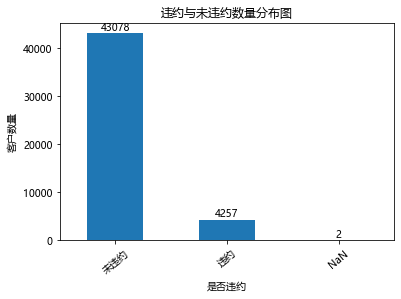

In [5]:
# 可视化 Default 列的数据

fig, ax = plt.subplots()

value_count = data['Default'].value_counts(dropna=False)
value_count.plot(kind='bar', rot=40, ax=ax)

cutil.plot_value_on_bar(y=value_count.values, ax=ax)
    
ax.set_xticklabels(['未违约', '违约', 'NaN'])

ax.set_xlabel('是否违约')
ax.set_ylabel('客户数量')

ax.set_title('违约与未违约数量分布图')


In [6]:
# 可视化多个数据与是否违约的关系

def plot_correlation(data, col, ax, title_name):
    default_rate = data.groupby(col)['Default'].sum() / data.groupby(col).size()
    sns.barplot(x=default_rate.index, y=default_rate.values, ax=ax)
    cutil.plot_value_on_bar(y=default_rate.round(3), ax=ax)
    
    # 设置文字
    ax.set_xlabel(title_name)
    ax.set_ylabel('违约率')
    ax.set_title(f'不同{title_name}的违约率数据')

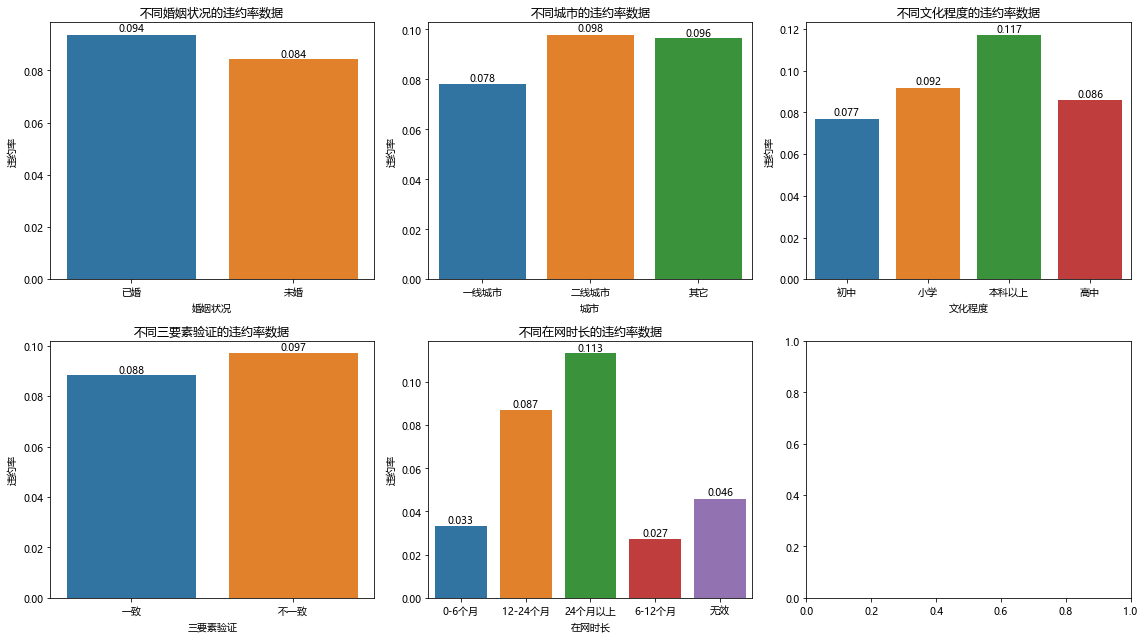

In [7]:
fig, axs = plt.subplots(2, 3, figsize=(16, 9))
# axs 应该是一维数组
axs = axs.flatten()

now_ploting = {
    'maritalStatus': '婚姻状况',
    'CityId': '城市',
    'education': '文化程度',
    'threeVerify': '三要素验证',
    'netLength': '在网时长'
}

for index, (col, display_name) in enumerate(now_ploting.items()):
    plot_correlation(data=data, col=col, ax=axs[index], title_name=display_name)
    
plt.tight_layout()

Text(0.5, 1.0, '开卡时长分布')

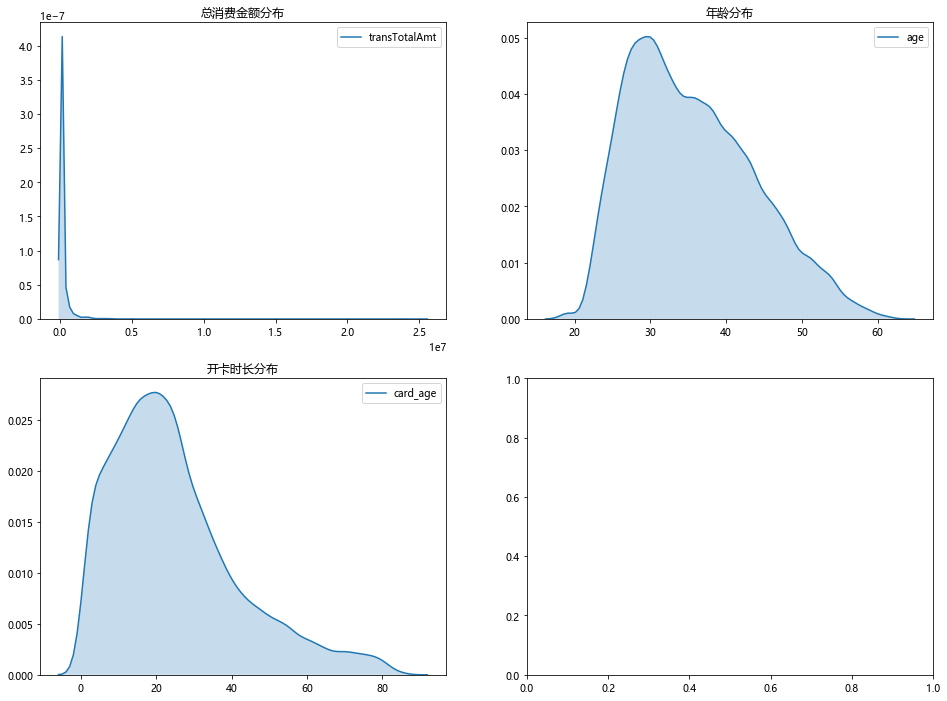

In [8]:
# 总消费金额、年龄的分布
fig, ((ax1, ax2), (ax3, _)) = plt.subplots(2, 2, figsize=(16, 12))

sns.kdeplot(data['transTotalAmt'], shade=True, ax=ax1)
sns.kdeplot(data['age'], shade=True, ax=ax2)
sns.kdeplot(data['card_age'], shade=True, ax=ax3)

ax1.set_title("总消费金额分布")
ax2.set_title("年龄分布")
ax3.set_title("开卡时长分布")

Text(0, 0.5, '总取现金额')

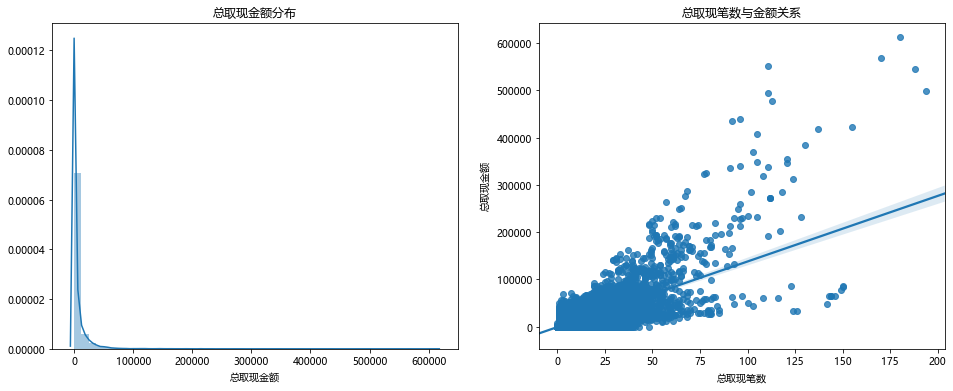

In [9]:
# 总取现金额可视化

fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(16, 6))
sns.distplot(data['cashTotalAmt'], ax=ax1)
sns.regplot(x=data['cashTotalCnt'], y=data['cashTotalAmt'], ax=ax2)

ax1.set_title('总取现金额分布')
ax1.set_xlabel('总取现金额')
ax2.set_title('总取现笔数与金额关系')
ax2.set_xlabel('总取现笔数')
ax2.set_ylabel('总取现金额')

Text(0, 0.5, '网上消费金额')

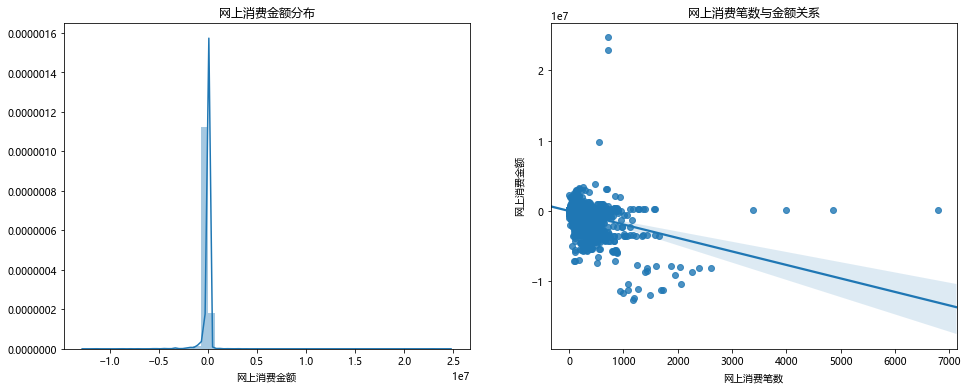

In [10]:
# 网上消费金额可视化

fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(16, 6))
sns.distplot(data['onlineTransAmt'], ax=ax1)
sns.regplot(x=data['onlineTransCnt'], y=data['onlineTransAmt'], ax=ax2)

ax1.set_title('网上消费金额分布')
ax1.set_xlabel('网上消费金额')
ax2.set_title('网上消费笔数与金额关系')
ax2.set_xlabel('网上消费笔数')
ax2.set_ylabel('网上消费金额')

In [11]:
# 检查有缺失值的特征

na_counts = data.isnull().sum()
na_counts[na_counts > 0].sort_values(axis=0, ascending=False)

idVerify         25781
maritalStatus     7492
threeVerify       3494
education         3014
sex                163
Default              2
dtype: int64

In [12]:
# 移除 Default 缺失值
data.dropna(subset=['Default'], inplace=True)

# 移除其它列缺失值
filling_columns = ['sex', 'maritalStatus', 'threeVerify', 'idVerify', 'education']
for column in filling_columns:
    data[column].fillna('未知', inplace=True)

# 填补 isCrime 异常值
data['isCrime'].replace(2, data['isCrime'].mode()[0], inplace=True)

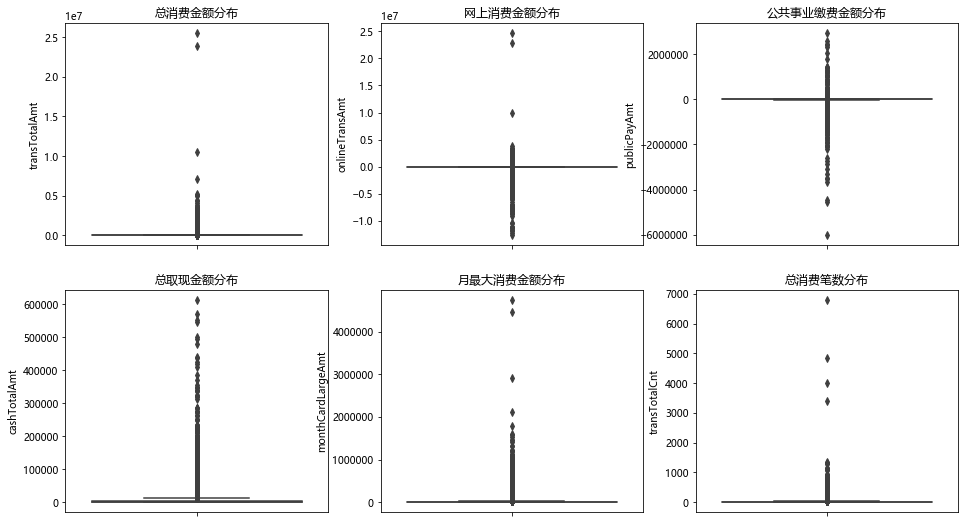

In [13]:
# 绘制连续型变量的盒图，观察异常值

boxplot_columns = [
    'transTotalAmt',
    'onlineTransAmt',
    'publicPayAmt', 
    'cashTotalAmt', 
    'monthCardLargeAmt',
    'transTotalCnt'
]

fig, axs = plt.subplots(2, 3, figsize=(16, 9))
axs = axs.flatten()

for i, col in enumerate(boxplot_columns):
    sns.boxplot(data[col], orient='v', ax=axs[i])
    axs[i].set_title(f'{DESCRIBE[col]}分布')    

In [14]:
# 观察总消费金额过大的客户
data[data.transTotalAmt > 2e7]

,CityId,Han,age,card_age,cashAmt_mean,cashAmt_non_null_months,cashCnt_mean,cashCnt_non_null_months,cashTotalAmt,cashTotalCnt,education,idVerify,inCourt,isBlackList,isCrime,isDue,maritalStatus,monthCardLargeAmt,netLength,noTransWeekPre,onlineTransAmt,onlineTransCnt,publicPayAmt,publicPayCnt,sex,threeVerify,transAmt_mean,transAmt_non_null_months,transCnt_mean,transCnt_non_null_months,transTotalAmt,transTotalCnt,Default
28446,一线城市,0,37.0,74,2109.884086,2,1.376011,2,4220,3,小学,未知,0,0,0,0,已婚,4447136,24个月以上,0.078347,2.286678e+07,713.0,-53112.600211,3.471682,男,一致,1.983204e+06,12,52.784678,12,23798486,647,0.0
43627,一线城市,0,37.0,78,2300.000000,2,1.500000,2,4600,3,小学,未知,0,0,0,0,已婚,4737770,24个月以上,0.080000,2.464593e+07,714.0,0.000000,0.000000,男,一致,2.122952e+06,12,55.333333,12,25475460,678,0.0


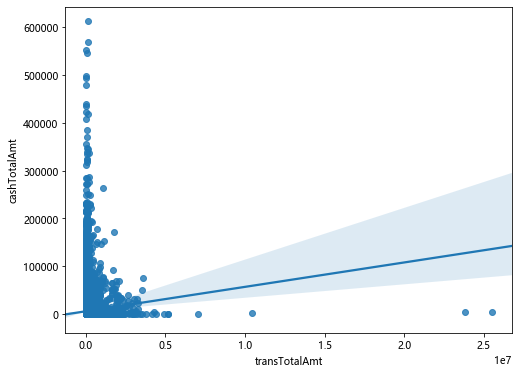

In [15]:
# 观察到该客户总取现金额十分小，现探究取现金额和消费金额是否有关系

fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x=data.transTotalAmt, y=data.cashTotalAmt, ax=ax)

# 由图可知：没什么关系
# 该客户数据予以保留

In [16]:
# 观察网上消费金额过大的数据
data.loc[data.onlineTransAmt > 6e6]

,CityId,Han,age,card_age,cashAmt_mean,cashAmt_non_null_months,cashCnt_mean,cashCnt_non_null_months,cashTotalAmt,cashTotalCnt,education,idVerify,inCourt,isBlackList,isCrime,isDue,maritalStatus,monthCardLargeAmt,netLength,noTransWeekPre,onlineTransAmt,onlineTransCnt,publicPayAmt,publicPayCnt,sex,threeVerify,transAmt_mean,transAmt_non_null_months,transCnt_mean,transCnt_non_null_months,transTotalAmt,transTotalCnt,Default
10660,二线城市,0,34.0,64,658.361865,1,0.429366,1,1317,1,小学,不一致,0,0,0,0,未婚,2102248,24个月以上,0.080000,9.821252e+06,545.0,-309020.535041,19.271404,男,一致,8.700832e+05,12,30.946680,12,10441031,378,0.0
28446,一线城市,0,37.0,74,2109.884086,2,1.376011,2,4220,3,小学,未知,0,0,0,0,已婚,4447136,24个月以上,0.078347,2.286678e+07,713.0,-53112.600211,3.471682,男,一致,1.983204e+06,12,52.784678,12,23798486,647,0.0
43627,一线城市,0,37.0,78,2300.000000,2,1.500000,2,4600,3,小学,未知,0,0,0,0,已婚,4737770,24个月以上,0.080000,2.464593e+07,714.0,0.000000,0.000000,男,一致,2.122952e+06,12,55.333333,12,25475460,678,0.0


In [17]:
# 删除网上消费金额过大的数据
data = data[data.onlineTransAmt < 2e7]

In [18]:
# 观察总消费笔数过大的数据
data[data.transTotalCnt > 2500]

,CityId,Han,age,card_age,cashAmt_mean,cashAmt_non_null_months,cashCnt_mean,cashCnt_non_null_months,cashTotalAmt,cashTotalCnt,education,idVerify,inCourt,isBlackList,isCrime,isDue,maritalStatus,monthCardLargeAmt,netLength,noTransWeekPre,onlineTransAmt,onlineTransCnt,publicPayAmt,publicPayCnt,sex,threeVerify,transAmt_mean,transAmt_non_null_months,transCnt_mean,transCnt_non_null_months,transTotalAmt,transTotalCnt,Default
23301,二线城市,0,30.0,21,214.940244,4,1.264371,4,997,5,小学,不一致,0,0,0,0,已婚,42498,12-24个月,0.542072,101176.966259,3990.0,3138.326576,4.344906,女,不一致,14433.619153,8,664.940550,8,108168,4002,0.0
32059,二线城市,0,29.0,21,225.466790,5,1.249333,5,1105,6,小学,不一致,0,0,0,0,已婚,42877,12-24个月,0.529440,100855.756224,3379.0,2904.637253,3.983996,男,不一致,13814.753938,9,563.311533,9,109154,3395,0.0
35393,一线城市,0,37.0,18,118.875360,2,0.951003,2,357,3,小学,不一致,0,0,0,0,未婚,37517,12-24个月,0.600000,100866.428433,4852.0,6716.176125,5.139756,女,不一致,15173.915051,7,807.462412,7,102494,4850,0.0
43736,二线城市,0,33.0,19,166.666667,3,1.333333,3,500,4,小学,不一致,0,0,0,0,已婚,40760,6-12个月,0.600000,102650.000000,6792.0,4210.000000,6.000000,女,一致,17271.666670,6,1131.000000,6,103650,6789,0.0


In [19]:
# 删除总消费笔数特别大的数据
data = data[data.transTotalCnt < 6000]

In [20]:
# 观察月最大消费过大的数据
data.loc[data.monthCardLargeAmt > 2.5e6]

# 这可能是某个富商用于大宗消费的账户，应予以保留

,CityId,Han,age,card_age,cashAmt_mean,cashAmt_non_null_months,cashCnt_mean,cashCnt_non_null_months,cashTotalAmt,cashTotalCnt,education,idVerify,inCourt,isBlackList,isCrime,isDue,maritalStatus,monthCardLargeAmt,netLength,noTransWeekPre,onlineTransAmt,onlineTransCnt,publicPayAmt,publicPayCnt,sex,threeVerify,transAmt_mean,transAmt_non_null_months,transCnt_mean,transCnt_non_null_months,transTotalAmt,transTotalCnt,Default
44049,一线城市,0,33.0,14,0.0,0,0.0,0,0,0,高中,未知,0,0,0,1,未知,2900000,24个月以上,0.79,2209650.0,6.0,0.0,0.0,男,未知,1009315.714,7,1.857143,7,7065210,12,0.0


In [21]:
# 观察公共事业缴费金额过小的数据
data.loc[data.publicPayAmt < -4e6]

# 数据应保留。

,CityId,Han,age,card_age,cashAmt_mean,cashAmt_non_null_months,cashCnt_mean,cashCnt_non_null_months,cashTotalAmt,cashTotalCnt,education,idVerify,inCourt,isBlackList,isCrime,isDue,maritalStatus,monthCardLargeAmt,netLength,noTransWeekPre,onlineTransAmt,onlineTransCnt,publicPayAmt,publicPayCnt,sex,threeVerify,transAmt_mean,transAmt_non_null_months,transCnt_mean,transCnt_non_null_months,transTotalAmt,transTotalCnt,Default
397,二线城市,0,38.0,57,0.000000,0,0.0000,0,0,0,小学,未知,0,0,0,0,未婚,581920,24个月以上,0.17000,-8.291000e+04,6.0,-4.546730e+06,66.000000,女,一致,130088.333300,12,2.750000,12,1561090,33,0.0
770,二线城市,0,29.0,23,500.000000,1,1.0000,1,500,1,高中,未知,0,0,0,0,已婚,5500,24个月以上,0.04000,-5.531850e+06,225.0,-6.034950e+06,141.000000,男,未知,834.166667,12,1.000000,12,10050,12,0.0
24944,二线城市,0,39.0,56,108.870225,0,0.1146,0,218,0,小学,未知,0,0,0,0,未婚,527565,24个月以上,0.15281,-4.169296e+05,44.0,-4.445474e+06,102.213675,女,一致,121599.607246,12,3.189301,12,1459224,38,0.0


In [22]:
# 将笔数为 0 的金额也设为 0

abnormal_columns = [
    'transTotal',
    'onlineTrans',    
    'publicPay', 
    'cashTotal',
]

for col in abnormal_columns:
    data.loc[data[col + 'Cnt'] == 0, col + 'Amt'] = 0

In [23]:
# 将离散型变量转换为字符串表示的数字，则 get_dummies 获得的属性能与服务器数据一致

data['maritalStatus'] = data['maritalStatus'].map({"未知": 0, "未婚": 1, "已婚": 2})
data['education'] = data['education'].map({"未知": 0, "小学": 1, "初中": 2, "高中": 3, "本科以上": 4})
data['idVerify'] = data['idVerify'].map({"未知": 0, "一致": 1, "不一致": 2})
data['threeVerify'] = data['threeVerify'].map({"未知": 0, "一致": 1, "不一致": 2})
data['netLength'] = data['netLength'].map({"无效": 0, "0-6个月": 1, "6-12个月": 2, "12-24个月": 3, "24个月以上": 4})
data['sex'] = data['sex'].map({"未知": 0, "男": 1, "女": 2})
data['CityId'] = data['CityId'].map({"一线城市": 1, "二线城市": 2, "其它": 3})

In [24]:
# 对数据进行 One-Hot 编码
data = pd.get_dummies(data, columns=['maritalStatus', 'education', 'idVerify', 'threeVerify', 'netLength', 'sex', 'CityId'])

In [25]:
# 导出当前 data，便于下一步操作
data.to_csv(PREFIX + 'data-1.csv', index=False)